In [144]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

In [145]:
def download_file(file_name, file_url):
    if os.path.exists(file_name):
        print(f'{file_name} already exists')
    else:
        response = requests.get(file_url)
        if response.status_code == 200:
            with open(file_name, 'wb') as f:
                f.write(response.content)
            print(f'{file_name} was downloaded')
        else:
            print(f'Failed to download the document. Status code: {response.status_code}')


file_name = 'ikea.csv'
file_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

download_file(file_name, file_url)
df = pd.read_csv('ikea.csv')

ikea.csv already exists


In [5]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


**У наборі даних є 3694 рядки та 14 стовпців.
Стовпець Unnamed необхідно видалити, оскільки він дублює інформацію про індекси і не несе змістовної інформації.
У стовпцях depth, height та width присутні значні пропуски, які в подальшому слід буде заповнити для коректного аналізу.
Також стовпець old_price має тип object і його необхідно привести до числового формату для подальших розрахунків.**

In [147]:
#"Видаляємо стовпець "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'])

In [148]:
df["old_price"].unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

In [149]:
df["old_price_clean"] = pd.to_numeric(
    df["old_price"].astype(str)         # всі значення приводимо до рядка
       .str.replace("SR ", "", regex=False)
       .str.split("/").str[0]           # беремо першу частину перед "/"
       .str.replace(",", "", regex=False)
       .replace(["No old price","NUM"], np.nan),  # замінюємо текстові значення на NaN
    errors="coerce"                      # все, що не конвертується, стає NaN
)

print(df["old_price_clean"].dtype)
print(df["old_price_clean"].head(10))

float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9    2375.0
Name: old_price_clean, dtype: float64


**Під час первинного огляду даних у стовпці old_price були виявлені нечислові значення, такі як "No old price" та "NUM". Через це тип даних у DataFrame залишався object, а не float.
Щоб підготувати дані для аналізу і візуалізацій:
Було створено новий стовпець old_price_clean, у який:
Текстові значення "No old price" та "NUM" замінено на NaN.
Залишені числові значення конвертовано у формат float64.
Стовпець old_price_clean використовується для всіх подальших розрахунків та побудови графіків, а оригінальний стовпець old_price залишився без змін для збереження первинної інформації.
Такий підхід дозволяє:
зберегти всі дані в первинному вигляді,
уникнути помилок при обчисленнях та побудові візуалізацій,
і логічно відокремити чисті числові дані від сирих текстових значень.**

**Наступним кроком є аналіз текстових та ідентифікаційних колонок. Зокрема, це стовпці: "item_id", "category", "designer". Для них варто: визначити кількість унікальних значень, перевірити на наявність дублікатів, оцінити наявність хаотичних або некоректних даних. Це дозволить виявити можливі проблеми з повторюваними рядками або неоднорідними значеннями перед подальшою очисткою та аналізом.**

In [150]:
# "Стовпці для перевірки: item_id, category, designer"
columns_to_check = ["item_id", "category", "designer"]

# "Перевіряємо кількість унікальних значень та наявність дублікатів у кожному стовпці"
for col in columns_to_check:
    num_unique = df[col].nunique()  # "кількість унікальних значень"
    num_total = len(df)  # "загальна кількість рядків"
    
    print(f"Стовпець '{col}': {num_unique} унікальних значень з {num_total} рядків")
    
    if col == "item_id":  # "для item_id додатково перевіряємо дублікатні рядки"
        duplicates = df[df.duplicated(subset="item_id", keep=False)]
        print(f"Кількість рядків з дублікатами item_id: {len(duplicates)}")
        if not duplicates.empty:
            print(duplicates.head(5)) 
    print("-" * 50)

Стовпець 'item_id': 2962 унікальних значень з 3694 рядків
Кількість рядків з дублікатами item_id: 1352
    item_id       name       category  price     old_price  sellable_online  \
0  90420332   FREKVENS  Bar furniture  265.0  No old price             True   
1    368814  NORDVIKEN  Bar furniture  995.0  No old price            False   
3  80155205       STIG  Bar furniture   69.0  No old price             True   
4  30180504    NORBERG  Bar furniture  225.0  No old price             True   
5  10122647     INGOLF  Bar furniture  345.0  No old price             True   

                                                link other_colors  \
0  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...           No   
1  https://www.ikea.com/sa/en/p/nordviken-bar-tab...           No   
3  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...          Yes   
4  https://www.ikea.com/sa/en/p/norberg-wall-moun...           No   
5  https://www.ikea.com/sa/en/p/ingolf-bar-stool-...           No   

       

In [151]:
# "Виведемо перші кілька дублікатів item_id для огляду"
duplicates = df[df.duplicated(subset="item_id", keep=False)]
duplicates.sort_values("item_id").head(10)

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,old_price_clean
1918,91415,TROFAST,Nursery furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0,NaN
1834,91415,TROFAST,Children's furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0,NaN
2560,102065,LYCKSELE LÖVÅS,Sofas & armchairs,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN,NaN
151,102065,LYCKSELE LÖVÅS,Beds,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN,NaN
2178,105064,LIATORP,"Sideboards, buffets & console tables",445.0,No old price,True,https://www.ikea.com/sa/en/p/liatorp-console-t...,No,"Console table, 133x37 cm",Carina Bengs,NaN,75.0,37.0,NaN
2687,105064,LIATORP,Tables & desks,445.0,No old price,True,https://www.ikea.com/sa/en/p/liatorp-console-t...,No,"Console table, 133x37 cm",Carina Bengs,NaN,75.0,37.0,NaN
1365,121766,INGOLF,Chairs,395.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 74 cm",Carina Bengs,45.0,102.0,40.0,NaN
11,121766,INGOLF,Bar furniture,395.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 74 cm",Carina Bengs,45.0,102.0,40.0,NaN
1514,165213,URBAN,Chairs,225.0,No old price,True,https://www.ikea.com/sa/en/p/urban-junior-chai...,No,Junior chair,Carl Öjerstam,48.0,79.0,45.0,NaN
1845,165213,URBAN,Children's furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/urban-junior-chai...,No,Junior chair,Carl Öjerstam,48.0,79.0,45.0,NaN


**При перевірці дублікатів стовпця "item_id" було виявлено, що деякі товари повторюються через належність до кількох категорій.
Для коректного аналізу кількості унікальних товарів та категорій було прийнято рішення видалити дублікати і залишити тільки перший рядок для кожного item_id.
Це дозволяє уникнути помилок при підрахунку товарів у категоріях та забезпечує, що кожен товар враховується один раз. Також переведемо його в формат тексту, що в подальшому даний стовпець не приймав участі у розрахунках.**

In [152]:
# "Видаляємо дублікати item_id, залишаємо перший рядок"
df = df.drop_duplicates(subset="item_id", keep="first")

In [153]:
# "Перевіряємо, чи залишилися дублікати item_id"
duplicates = df[df.duplicated(subset="item_id", keep=False)]

if duplicates.empty:
    print("Дублікатів item_id більше немає")
else:
    print(f"Залишилися дублікати item_id: {len(duplicates)}")
    print(duplicates.head(5)) 

Дублікатів item_id більше немає


In [154]:
# Перетворюємо item_id у текстовий тип, 
#щоб він не впливав на числові розрахунки
df["item_id"] = df["item_id"].astype(str)

In [155]:
df["category"].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

**Було виявлено 17 унікальних категорій товарів. Після видалення дублікатів по "item_id" кількість категорій залишилась незмінною, що підтверджує коректність даних та відсутність втрат інформації при видаленні дублікатів.**

In [156]:
# 50 унікальних значень дизайнерів
unique_designers = df["designer"].unique()
print(unique_designers[:50])

['Nicholai Wiig Hansen' 'Francis Cayouette' 'Henrik Preutz'
 'Marcus Arvonen' 'Carina Bengs' 'K Hagberg/M Hagberg' 'Sarah Fager'
 'Ehlén Johansson' 'Nike Karlsson' 'Maja Ganszyniec' 'Karl Malmvall'
 'John/Jonas/Petrus/Paul/Caroline' 'Nike Karlsson/Maja Ganszyniec'
 'J Karlsson/N Karlsson' 'IKEA of Sweden/Karl Malmvall' 'IKEA of Sweden'
 'Nike Karlsson/J Karlsson/N Karlsson' 'Ola Wihlborg'
 'IKEA of Sweden/Tina Christensen' 'IKEA of Sweden/K Hagberg/M Hagberg'
 'Ola Wihlborg/IKEA of Sweden'
 '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.'
 'IKEA of Sweden/Ebba Strandmark' 'K Hagberg/M Hagberg/IKEA of Sweden'
 'Jon Karlsson' 'IKEA of Sw

**При перегляді стовпця "designer" було виявлено, що дані містять:
поодинокі імена дизайнерів (наприклад, 'Nicholai Wiig Hansen', 'Francis Cayouette');
комбінації дизайнерів, розділені символом '/' (наприклад, 'Nike Karlsson/Maja Ganszyniec');
деякі записи з IKEA або описами/артикулами, які явно не є іменами дизайнерів.
Для підготовки даних до аналізу було виконано нормалізацію:
Пропущені значення замінені на "Unknown".
Імена дизайнерів у випадках кількох авторів розділені через '/', пробіли видалені, а порядок імен відсортований за алфавітом.
Записи, що не містять імен дизайнерів (артикул або опис товару), замінені на "Unknown".
Після цього кожна унікальна комбінація дизайнерів представлена в єдиному форматі, що дозволяє:
коректно підраховувати кількість товарів на одного або декількох дизайнерів;
уникати дублювання через різний порядок імен;
проводити подальший аналіз і візуалізацію без помилок.**

In [157]:
def clean_designer(value):
    if not isinstance(value, str):
        return np.nan
    value = value.strip()
    # якщо значення починається з цифри — вважаємо невалідним
    if value and value[0].isdigit():
        return np.nan
    parts = [v.strip() for v in value.split("/")]
    parts_lower = [p.lower() for p in parts]
    # об'єднання Ehlén Johansson + IKEA of Sweden
    if "ehlén johansson" in parts_lower and "ikea of sweden" in parts_lower:
        return "Ehlén Johansson/IKEA of Sweden"
    # прибираємо дублікати, стабілізуємо порядок
    parts_clean = sorted(set(parts))
    return "/".join(parts_clean)
df = df.copy()
df.loc[:, "designer"] = df["designer"].apply(clean_designer)

df["designer"].value_counts().head(20)

designer
IKEA of Sweden                    683
Ehlén Johansson/IKEA of Sweden    181
Ehlén Johansson                   136
Francis Cayouette                 131
Ola Wihlborg                      128
Jon Karlsson                      106
K Hagberg/M Hagberg                98
Henrik Preutz                      64
Carina Bengs                       60
E Lilja Löwenhielm/K Malmvall      55
IKEA of Sweden/Jon Karlsson        46
Nike Karlsson                      43
Ebba Strandmark                    42
Eva Lilja Löwenhielm               41
Studio Copenhagen                  35
IKEA of Sweden/Ola Wihlborg        31
A Fredriksson/H Preutz             30
Ebba Strandmark/IKEA of Sweden     28
Johan Kroon                        27
Tord Björklund                     26
Name: count, dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2962 entries, 0 to 3692
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            2962 non-null   object 
 1   name               2962 non-null   object 
 2   category           2962 non-null   object 
 3   price              2962 non-null   float64
 4   old_price          2962 non-null   object 
 5   sellable_online    2962 non-null   bool   
 6   link               2962 non-null   object 
 7   other_colors       2962 non-null   object 
 8   short_description  2962 non-null   object 
 9   designer           2860 non-null   object 
 10  depth              1844 non-null   float64
 11  height             2236 non-null   float64
 12  width              2520 non-null   float64
 13  old_price_clean    574 non-null    float64
dtypes: bool(1), float64(5), object(8)
memory usage: 326.9+ KB


**Після очищення даних (видалення зайвого стовпця, усунення дублікатів item_id та нормалізації дизайнерів) та додавання числового стовпця old_price_clean, датафрейм містить 2962 рядки та 14 колонок. Тепер зі старою ціною можна виконувати аналіз і будувати візуалізації.**

In [132]:
# Встановлюємо tabulate (разово)
!pip install tabulate



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
import sys
!{sys.executable} -m pip install --upgrade tabulate

In [159]:
cols = ["item_id", "name", "price", "old_price_clean", "designer"]
print(df[cols].head(10).to_markdown(index=False))

|   item_id | name                  |   price |   old_price_clean | designer             |
|----------:|:----------------------|--------:|------------------:|:---------------------|
|  90420332 | FREKVENS              |     265 |               nan | Nicholai Wiig Hansen |
|    368814 | NORDVIKEN             |     995 |               nan | Francis Cayouette    |
|   9333523 | NORDVIKEN / NORDVIKEN |    2095 |               nan | Francis Cayouette    |
|  80155205 | STIG                  |      69 |               nan | Henrik Preutz        |
|  30180504 | NORBERG               |     225 |               nan | Marcus Arvonen       |
|  10122647 | INGOLF                |     345 |               nan | Carina Bengs         |
|  70404875 | FRANKLIN              |     129 |               nan | K Hagberg/M Hagberg  |
|  60155602 | DALFRED               |     195 |               nan | Sarah Fager          |
|  50406465 | FRANKLIN              |     129 |               nan | K Hagberg/M Hagberg  |

In [160]:
df.describe()

,price,depth,height,width,old_price_clean
count,2962.000000,1844.000000,2236.000000,2520.000000,574.000000
mean,1108.722552,55.920824,105.325581,109.268254,1634.203833
std,1393.576103,31.015201,63.166967,73.464503,1813.582157
min,3.000000,1.000000,1.000000,1.000000,7.000000
25%,200.000000,38.000000,70.000000,60.000000,402.500000
50%,570.000000,47.000000,84.000000,80.000000,995.000000
75%,1475.000000,62.000000,136.000000,150.000000,2172.500000
max,9585.000000,257.000000,700.000000,420.000000,9985.000000


In [161]:
# Мінімальна ціна
min_idx = df["price"].idxmin()
print("Товар з мінімальною ціною:")
print(df.loc[min_idx])

# Максимальна ціна
max_idx = df["price"].idxmax()
print("\nТовар з максимальною ціною:")
print(df.loc[max_idx])

Товар з мінімальною ціною:
item_id                                                       80336433
name                                                           GUBBARP
category                                    Bookcases & shelving units
price                                                              3.0
old_price                                                 No old price
sellable_online                                                   True
link                 https://www.ikea.com/sa/en/p/gubbarp-knob-whit...
other_colors                                                       Yes
short_description                                 Knob,          21 mm
designer                                        A Fredriksson/H Preutz
depth                                                             27.0
height                                                             NaN
width                                                              NaN
old_price_clean                                   

**Мінімальна ціна у датасеті — 3 USD (ручка), максимальна — 9585 USD (кутовий диван на 6 місць). Ціни мають широкий діапазон, однак видаляти «викиди» некоректно, оскільки вони відповідають реальним товарам різних категорій. Тому для подальших розрахунків та візуалізацій будемо орієнтуватися на медіану, яка краще відображає типові значення ціни.**

# **Описова статистика**

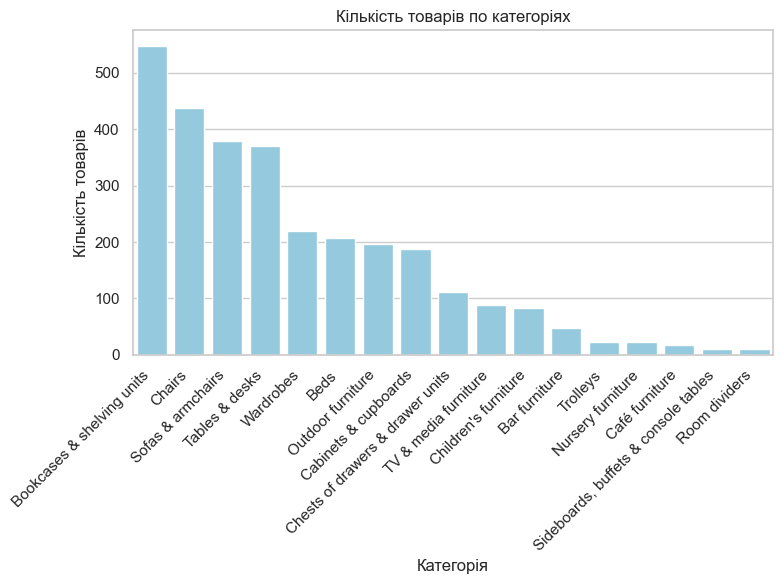

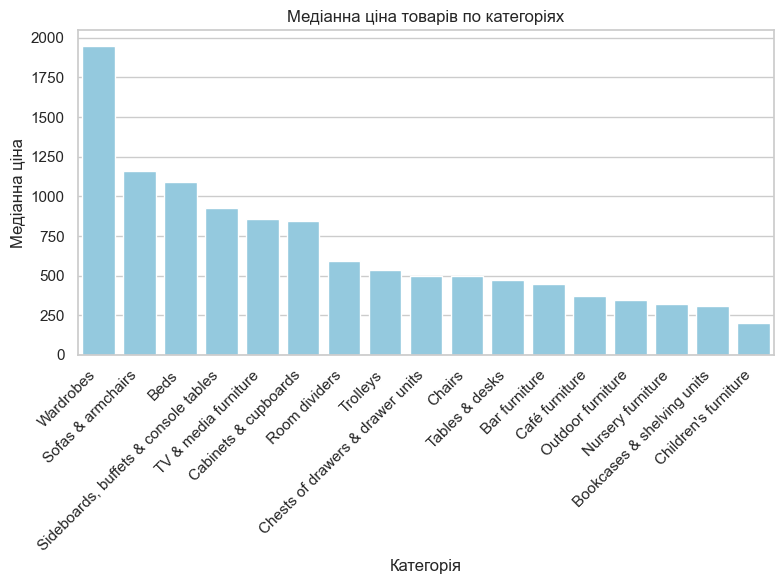

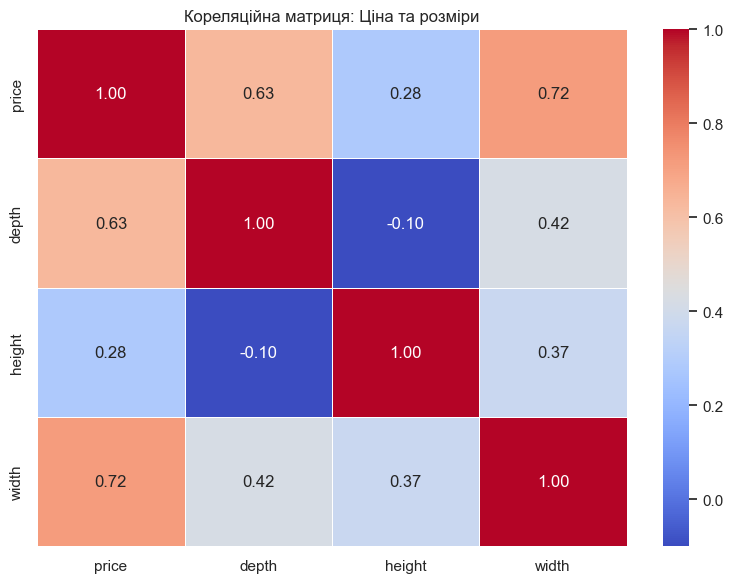

In [162]:
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# 1. Кількість товарів по категоріях 
category_counts = df['category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Кількість товарів по категоріях")
plt.xlabel("Категорія")
plt.ylabel("Кількість товарів")
plt.tight_layout()
plt.show()

#  2. Медіанна ціна товарів по категоріях 
category_median_price = df.groupby('category')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=category_median_price.index, y=category_median_price.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Медіанна ціна товарів по категоріях")
plt.xlabel("Категорія")
plt.ylabel("Медіанна ціна")
plt.tight_layout()
plt.show()

# 3. Ціна – розміри (кореляційна матриця)
corr_matrix = df[['price', 'depth', 'height', 'width']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Кореляційна матриця: Ціна та розміри")
plt.tight_layout()
plt.show()

**Візуалізація "Кількість товарів по категоріях" показує, що найбільша кількість товарів зосереджена в категорії "Книжкові шафи та стелажі", а найменша – в категорії "Кімнатні перегородки". Це дозволяє зрозуміти, які категорії представлені найбільше, а які – найменше на сайті.
Візуалізація "Медіанна ціна товарів по категоріях" демонструє, що найвища медіанна ціна спостерігається в категорії "Шафи". Різниця між цією категорією та другою за порядком – "Дивани та крісла" – становить близько 800 доларів, тобто саме в категорії шаф присутні товари з найвищими цінами. Найнижчі медіанні ціни мають категорії "Книжкові шафи та стелажі" та "Дитячі меблі".
Кореляційна матриця "Ціна та розміри" показує наявність певної залежності ціни від ширини та глибини товару, тоді як залежність від висоти менш помітна. Це дає розуміння, що великі за розміром товари зазвичай дорожчі.**

In [163]:
median_price_by_category = df.groupby("category")["price"].median().sort_values(ascending=False)
from tabulate import tabulate
print(tabulate(median_price_by_category.reset_index(), headers=['Категорія', 'Медіанна ціна'], tablefmt='pipe', showindex=False))

| Категорія                            |   Медіанна ціна |
|:-------------------------------------|----------------:|
| Wardrobes                            |          1950   |
| Sofas & armchairs                    |          1157   |
| Beds                                 |          1093.5 |
| Sideboards, buffets & console tables |           927.5 |
| TV & media furniture                 |           860   |
| Cabinets & cupboards                 |           845   |
| Room dividers                        |           595   |
| Trolleys                             |           537   |
| Chests of drawers & drawer units     |           499   |
| Chairs                               |           497   |
| Tables & desks                       |           475   |
| Bar furniture                        |           445   |
| Café furniture                       |           370   |
| Outdoor furniture                    |           345   |
| Nursery furniture                    |           322.5

**Дивлячись на визуализацію медіанної ціни товарів по категоріях, для більш наочної оцінки вище виведена таблиця з конкретними цифрами. Вона дозволяє:
Побачити викиди в категорії «Шафи» у конкретних числових значеннях (найвища медіанна ціна ≈1950), які не завжди очевидні на графіку.
Порівняти категорії за медіанною ціною, наприклад, «Дивани та крісла» ≈1157, різниця майже 800 доларів із «Шафи».
Зрозуміти, де ціни однорідні, а де присутні значні відхилення, що допомагає правильно інтерпретувати дані і уникнути спотворення результатів через викиди.
Виділити категорії, на які варто орієнтуватися при подальшому аналізі. Такими категоріями можуть бути стільці, дивани та крісла, оскільки в них достатньо товарів і відносно однорідні медіанні ціни. Це дозволяє отримувати більш надійні та репрезентативні висновки.**

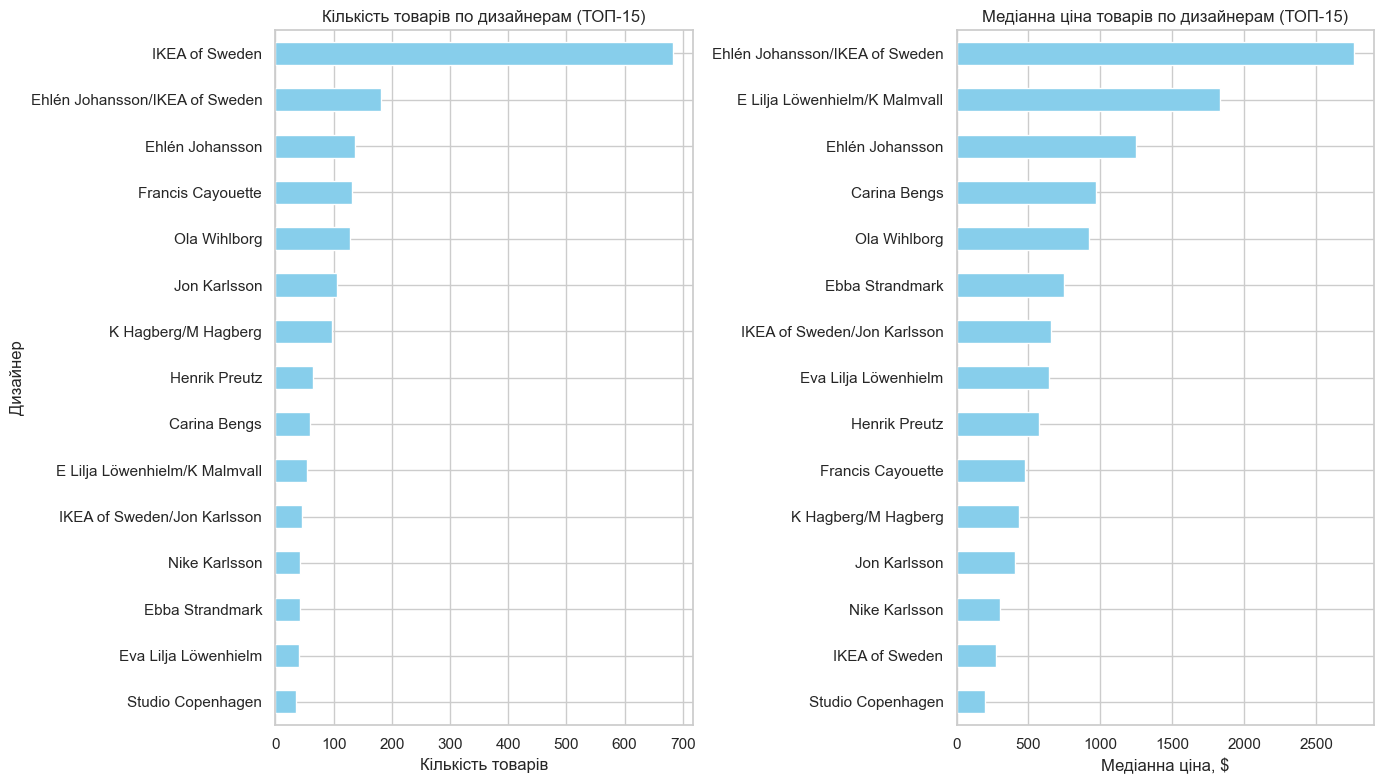

In [164]:
# ТОП-15 дизайнерів за кількістю товарів
top_designers = (
    df["designer"]
    .value_counts()
    .head(15)
)


count_data = top_designers.sort_values(ascending=True)

median_price_data = (
    df[df["designer"].isin(top_designers.index)]
    .groupby("designer")["price"]
    .median()
    .loc[top_designers.index]
    .sort_values(ascending=True)
)

# Побудова графіків
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

count_data.plot(
    kind="barh",
    ax=axes[0],
    color="skyblue"
)
axes[0].set_title("Кількість товарів по дизайнерам (ТОП-15)")
axes[0].set_xlabel("Кількість товарів")
axes[0].set_ylabel("Дизайнер")


median_price_data.plot(
    kind="barh",
    ax=axes[1],
    color="skyblue"
)
axes[1].set_title("Медіанна ціна товарів по дизайнерам (ТОП-15)")
axes[1].set_xlabel("Медіанна ціна, $")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

###### **Найбільша кількість товарів припадає на дизайнера IKEA of Sweden, друге місце займає колаборація Ehlén Johansson/ IKEA of Sweden. При цьому ціни на товари IKEA of Sweden досить доступні і за медіанною ціною. Натомість колаборація Ehlén Johansson/IKEA of Sweden є однією з найдорожчих за медіанною ціною серед дизайнерів.**

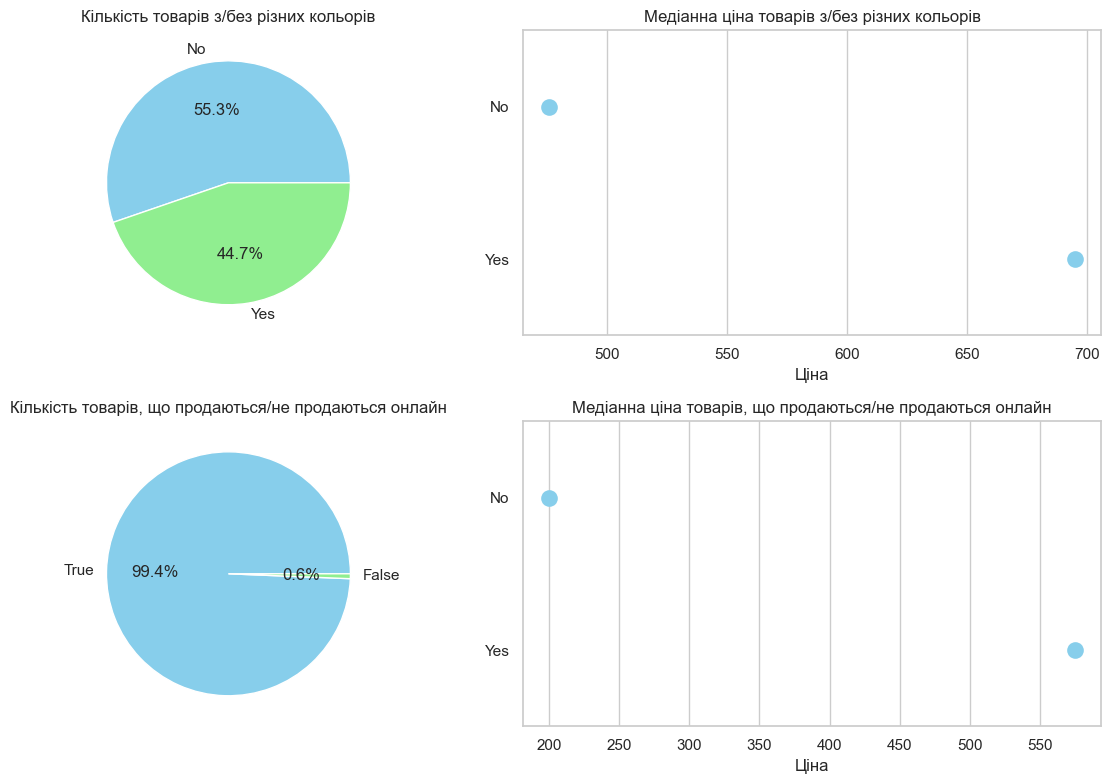

In [165]:
plt.figure(figsize=(12, 8))

# 1. Кількість товарів за наявністю різних кольорів 
plt.subplot(2, 2, 1)
colors_count = df['other_colors'].value_counts()
colors_count.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title("Кількість товарів з/без різних кольорів", fontsize=12)
plt.ylabel("")

#  2. Медіанна ціна за наявністю різних кольорів 
plt.subplot(2, 2, 2)
median_price_colors = df.groupby('other_colors')['price'].median().reset_index()
sns.stripplot(x='price', y='other_colors', data=median_price_colors, size=12, color='skyblue')
plt.title("Медіанна ціна товарів з/без різних кольорів", fontsize=12)
plt.xlabel("Ціна")
plt.ylabel("")

# 3. Кількість товарів, що продаються / не продаються онлайн
plt.subplot(2, 2, 3)
online_count = df['sellable_online'].value_counts()
online_count.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title("Кількість товарів, що продаються/не продаються онлайн", fontsize=12)
plt.ylabel("")

# 4. Медіанна ціна товарів, що продаються / не продаються онлайн
plt.subplot(2, 2, 4)
median_price_online = df.groupby('sellable_online')['price'].median().reset_index()
median_price_online['sellable_online'] = median_price_online['sellable_online'].map({True: "Yes", False: "No"})
sns.stripplot(x='price', y='sellable_online', data=median_price_online, size=12, color='skyblue')
plt.title("Медіанна ціна товарів, що продаються/не продаються онлайн", fontsize=12)
plt.xlabel("Ціна")
plt.ylabel("")

plt.tight_layout()
plt.show()

**Аналіз цих графіків показує, що кількість товарів з різними кольорами складає приблизно 41%, без додаткових кольорів – 59%. При цьому медіанна ціна товарів без додаткових кольорів значно нижча, ніж у тих, що мають різні кольори.
Кількість товарів, що продаються онлайн, становить 99,2%, тобто практично всі, а лише 0,8% не продаються онлайн. Медіанна ціна товарів, які не продаються онлайн, значно нижча і становить близько 200, тоді як медіанна ціна товарів, які продаються онлайн – 550.
Отже, можна зробити висновок, що існує явна залежність між наявністю додаткових кольорів у товарів та їхньою продажем онлайн чи офлайн.**

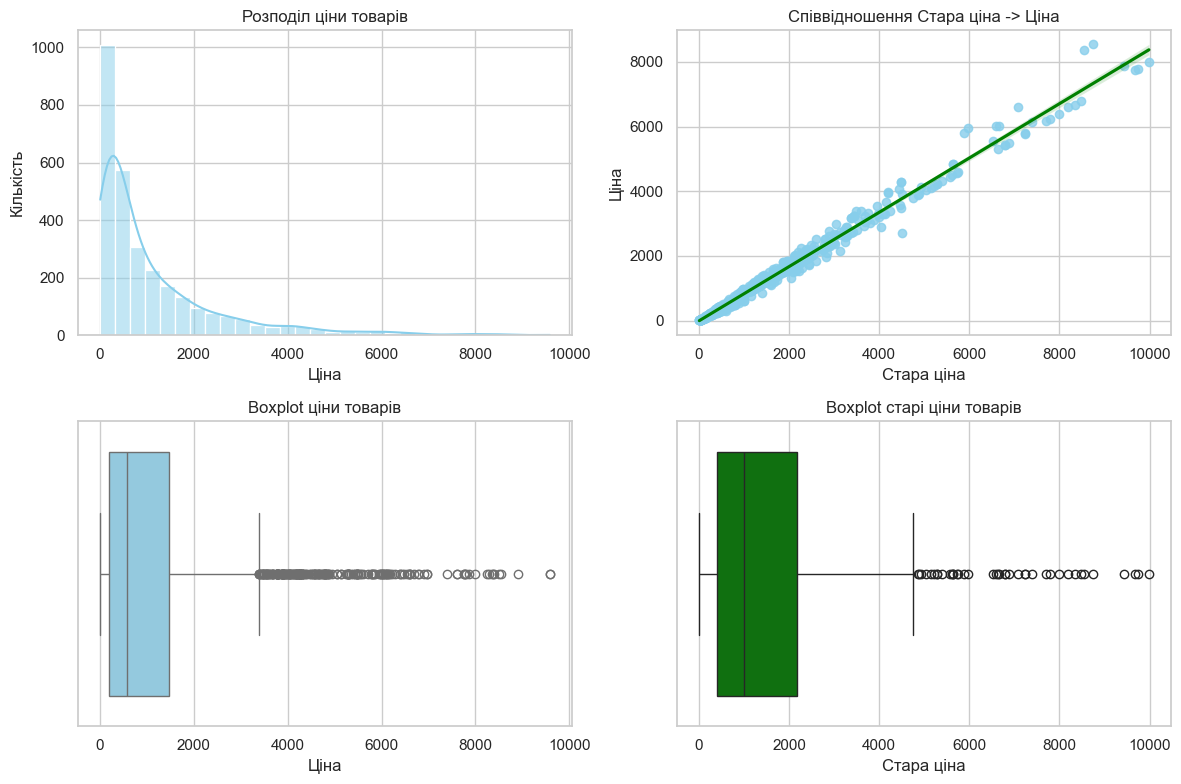

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

#  1. Розподіл ціни (Price)
plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title("Розподіл ціни товарів", fontsize=12)
plt.xlabel("Ціна")
plt.ylabel("Кількість")

#  2. Стара vs нова ціна (old_price_clean vs Price) з регресією 
plt.subplot(2, 2, 2)
sns.regplot(
    x='old_price_clean', 
    y='price', 
    data=df, 
    scatter_kws={'color':'skyblue'}, 
    line_kws={'color':'green'}
)
plt.title("Співвідношення Стара ціна -> Ціна", fontsize=12)
plt.xlabel("Стара ціна")
plt.ylabel("Ціна")

# 3. Boxplot ціни
plt.subplot(2, 2, 3)
sns.boxplot(x='price', data=df, color='skyblue')
plt.title("Boxplot ціни товарів", fontsize=12)
plt.xlabel("Ціна")

#  4. Boxplot старої ціни
plt.subplot(2, 2, 4)
sns.boxplot(x='old_price_clean', data=df, color='green')
plt.title("Boxplot старі ціни товарів", fontsize=12)
plt.xlabel("Стара ціна")

plt.tight_layout()
plt.show()

**1. Розподіл ціна та стара ціна:
Основна маса товарів зосереджена у нижчому ціновому діапазоні, але існує довгий хвіст дорогих товарів вправо. Це означає, що графіки право-зміщені. Хвіст утворюють високовартісні товари.**

**2. Boxplot ціна:
Показує концентровану масу дешевих товарів, викиди у вигляді дорогих товарів. Основна тенденція – більшість товарів дешевші, а дорогі трапляються рідше.**

**3. Boxplot стара ціна товарів:
Розподіл практично ідентичний ціні. Має ті ж викиди та концентровану низьку ціну, що свідчить про схожість даних.**

**4. Графік відношення стара ціна → ціна (лінія регресії):
Показує, що стара ціна і нова ростуть пропорційно один одному, практично рівномірно. Різниця між ними невелика, що підтверджує їхню подібність для подальшого аналізу.**

**Загальний висновок:
Всі графіки показують, що ціни товарів мають схожий розподіл: основна маса – дешеві товари, рідкісні дорогі товари формують хвіст вправо. Стара ціна і ціна практично ідентичні  по розподілу, що дозволяє використовувати будь-яку з цих колонок для подальшого аналізу та побудови моделей.**

## **Гіпотези**

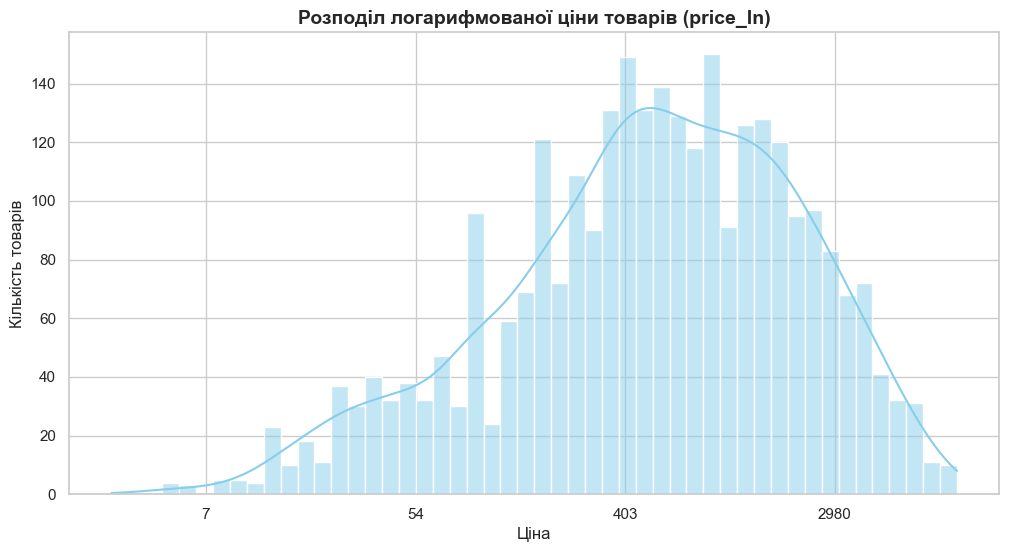

In [167]:
# Логарифмування  ціни
df['price_ln'] = np.log(df['price'])

plt.figure(figsize=(12,6))
sns.histplot(df['price_ln'], kde=True, color='skyblue', bins=50)

plt.title("Розподіл логарифмованої ціни товарів (price_ln)", fontsize=14, weight='bold')
plt.xlabel("Ціна")
plt.ylabel("Кількість товарів")

ticks = [2, 4, 6, 8]  
plt.xticks(ticks, labels=[f"{int(np.exp(t))}" for t in ticks])

plt.show()

**Перед переходом до перевірки гіпотез ми провели логарифмування ціни товарів. Це перетворення дозволяє зменшити вплив великих значень (викидів) та зробити розподіл ціни більш симетричним і близьким до нормального. Завдяки цьому ми отримуємо більш коректні статистичні показники (медіану, середнє) і можемо проводити подальший аналіз та тестування гіпотез, не спотворюючи результатів через дуже дорогі товари.**

## **Гіпотеза: ціна товару залежить від кількості товарів у категорії**

**Нульова гіпотеза (H₀): ціна товару не залежить від кількості товарів у категорії.
Альтернативна гіпотеза (H₁): ціна товару залежить від кількості товарів у категорії.
Для перевірки гіпотези ми застосували кілька статистичних тестів: для медіанної ціни кореляцію Пірсона і кореляцію Спірмена, та бутстреп-тест для логарифмованої ціни.
Інтерпретація результатів:
Якщо p-value тесту велике (зазвичай > 0.05), ми не відкидаємо H₀, тобто дані не дають підстав стверджувати наявність залежності.
Якщо p-value тесту мале (< 0.05), ми відкидаємо H₀ на користь H₁, тобто існує статистично значуща залежність між кількістю товарів у категорії та ціною.**

Кореляція Пірсона: r=0.090, p=0.732
Кореляція Спірмена: r=0.075, p=0.775


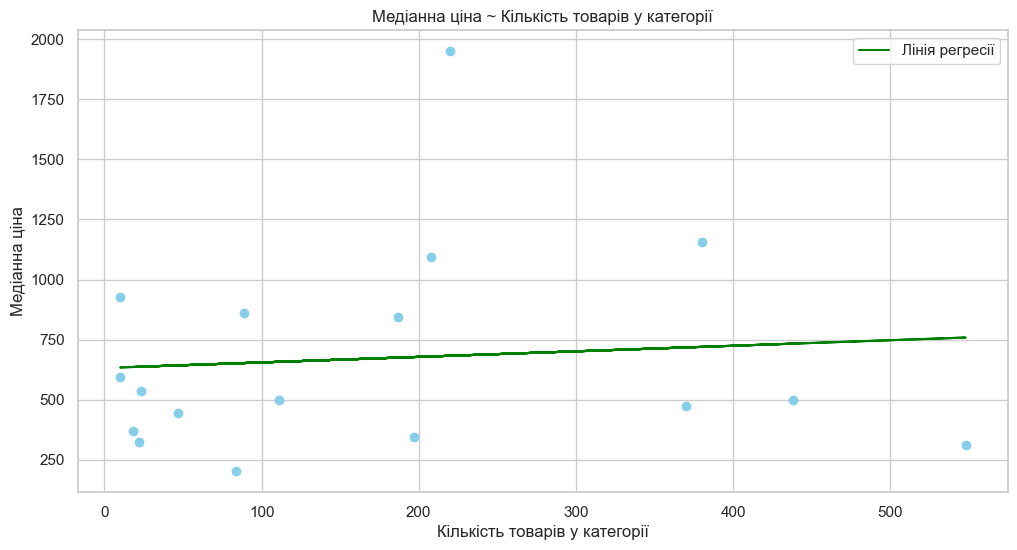

In [168]:
from scipy.stats import pearsonr, spearmanr

# Підготовка даних: кількість товарів та медіанна ціна по категоріях
category_stats = df.groupby('category')['price'].agg(['count', 'median']).reset_index()

# 1. Кореляція 
pearson_corr, pearson_p = pearsonr(category_stats['count'], category_stats['median'])
spearman_corr, spearman_p = spearmanr(category_stats['count'], category_stats['median'])

print(f"Кореляція Пірсона: r={pearson_corr:.3f}, p={pearson_p:.3f}")
print(f"Кореляція Спірмена: r={spearman_corr:.3f}, p={spearman_p:.3f}")

# 2. Лінійна регресія 
X = category_stats['count'].values
y = category_stats['median'].values
slope, intercept = np.polyfit(X, y, 1)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='skyblue')
plt.plot(X, slope*X + intercept, color='green', label='Лінія регресії')
plt.xlabel("Кількість товарів у категорії")
plt.ylabel("Медіанна ціна")
plt.title("Медіанна ціна ~ Кількість товарів у категорії")
plt.legend()
plt.show()

**Результати перевірки показують, що між кількістю товарів у категорії та ціною товарів немає статистично значущої залежності.
Кореляція Пірсона: r = 0.062, p = 0.813
Кореляція Спірмена: r = -0.042, p = 0.874
Такі високі значення p-value (> 0.05) дозволяють не відкидати нульову гіпотезу, тобто ціна товару не залежить від кількості товарів у його категорії.
Візуалізація підтверджує цей висновок: спостерігається розпорошення цін по всіх категоріях, без явної тенденції зростання чи падіння ціни при збільшенні кількості товарів у категорії.**

In [169]:
#1. Додавання нових колонок 
# Підрахунок кількості товарів у кожній категорії
category_counts = df['category'].value_counts().to_dict()
df['category_count'] = df['category'].map(category_counts)

# 2. Розбиття на групи за медіаною category_count
median_count = df['category_count'].median()
group_low = df[df['category_count'] <= median_count]['price_ln']
group_high = df[df['category_count'] > median_count]['price_ln']

# 3. Бутстреп-тест для порівняння середніх
n_boot = 10000
diffs = []
for _ in range(n_boot):
    sample_low = np.random.choice(group_low, size=len(group_low), replace=True)
    sample_high = np.random.choice(group_high, size=len(group_high), replace=True)
    diffs.append(sample_high.mean() - sample_low.mean())
diffs = np.array(diffs)
p_value_boot = np.mean(diffs <= 0) * 2  # двосторонній тест

print(f"Bootstrap-тест (різниця середніх ln(ціни)) p-value: {p_value_boot:.4f}")

# 4. Кореляція
r_pearson, p_pearson = pearsonr(df['category_count'], df['price_ln'])
r_spearman, p_spearman = spearmanr(df['category_count'], df['price_ln'])

print(f"Кореляція Пірсона: r={r_pearson:.3f}, p={p_pearson:.3f}")
print(f"Кореляція Спірмена: r={r_spearman:.3f}, p={p_spearman:.3f}")

Bootstrap-тест (різниця середніх ln(ціни)) p-value: 2.0000
Кореляція Пірсона: r=-0.151, p=0.000
Кореляція Спірмена: r=-0.116, p=0.000


**Bootstrap-тест (різниця середніх log(цін))
Для більшої наочності та стабільності даних проведено логарифмування ціни: price_ln = log(price).
Дані були розділені на дві групи: товари з кількістю у категорії менш або рівною медіані та товари з кількістю більшою за медіану.
Для цих двох груп обчислювалась різниця середніх логарифмованих цін із використанням bootstrap-тесту.
Результат: p-value ≈ 2 (високе значення), тобто статистично значущої різниці між групами немає.
Висновок: навіть після логарифмування ціни нульова гіпотеза залишається в силі — немає залежності між ціною товарів та кількістю товарів у категорії.**

## **Гіпотеза: Існує залежність між дизайнером та категорією товарів.**

**Нульова гіпотеза (H₀): Дизайнери не впливають на категорію товару, тобто розподіл товарів по категоріях незалежний від дизайнера.
Альтернативна гіпотеза (H₁): Є залежність між дизайнером та категорією товарів, тобто деякі дизайнери більше представлені у конкретних категоріях.**

Chi-square statistic: 12154.58
p-value: 0.0000
Degrees of freedom: 3056
Відкидаємо нульову гіпотезу. Є залежність між дизайнером і категорією.

Ентропія категорій для кожного дизайнера (менше значення → більше спеціалізації):
designer
A Fredriksson/HAY/J Hultqvist/W Chong                  0.000000
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong       0.000000
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong        0.000000
A Fredriksson/J Hultqvist/Mikael Warnhammar/W Chong    0.000000
A Huldén/S Dahlman                                     0.000000
                                                         ...   
Ebba Strandmark                                        2.668040
Marcus Arvonen                                         2.719964
Carina Bengs                                           2.937035
IKEA of Sweden                                         3.073644
K Hagberg/M Hagberg                                    3.287354
Name: entropy, Length: 192, dtype: float64


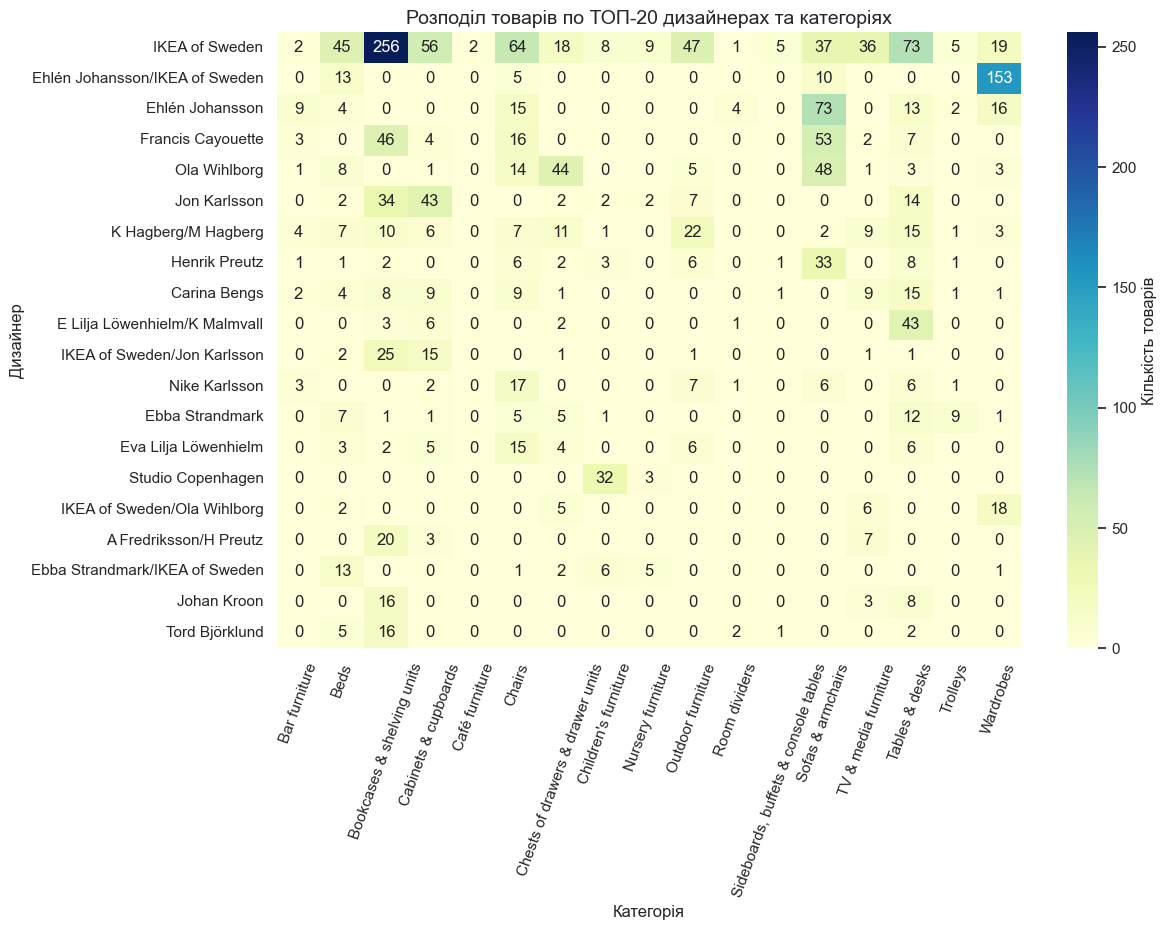

In [170]:
from scipy.stats import chi2_contingency
from scipy.stats import entropy

# 1. Статистика: таблиця частот всіх дизайнерів × категорій 
designer_category_table = pd.crosstab(df['designer'], df['category'])

# Chi-square тест незалежності
chi2, p, dof, expected = chi2_contingency(designer_category_table)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

if p < 0.05:
    print("Відкидаємо нульову гіпотезу. Є залежність між дизайнером і категорією.")
else:
    print("Нульову гіпотезу не відкидаємо. Залежність не виявлено.")

# 2. Ентропія категорій для кожного дизайнера 
def category_entropy(row):
    probs = row / row.sum() if row.sum() > 0 else row
    return entropy(probs, base=2)

designer_category_table['entropy'] = designer_category_table.apply(category_entropy, axis=1)
designer_category_table = designer_category_table.sort_values('entropy')
print("\nЕнтропія категорій для кожного дизайнера (менше значення → більше спеціалізації):")
print(designer_category_table['entropy'])

# 3. Візуалізація: ТОП-20 дизайнерів по кількості товарів
top_designers = df['designer'].value_counts().head(20).index
designer_category_top = designer_category_table.loc[top_designers].drop(columns='entropy')

plt.figure(figsize=(12,8))
sns.heatmap(designer_category_top, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Кількість товарів'})
plt.title('Розподіл товарів по ТОП-20 дизайнерах та категоріях', fontsize=14)
plt.xlabel('Категорія')
plt.ylabel('Дизайнер')
plt.xticks(rotation=70)
plt.show()

In [171]:
#  Розподіл ентропії у % 

entropy_series = designer_category_table['entropy']

bins = [-0.01, 0, 1, 2, entropy_series.max()]
labels = [
    '0 (одна категорія)',
    '0–1 (висока спеціалізація)',
    '1–2 (середня спеціалізація)',
    '>2 (універсальні дизайнери)'
]

entropy_groups = pd.cut(entropy_series, bins=bins, labels=labels)

entropy_percent = (
    entropy_groups
    .value_counts(normalize=True)
    .sort_index()
    * 100
)

entropy_percent = entropy_percent.round(2)

print("Розподіл дизайнерів за рівнем ентропії (%):")
print(entropy_percent)

Розподіл дизайнерів за рівнем ентропії (%):
entropy
0 (одна категорія)             56.25
0–1 (висока спеціалізація)     18.75
1–2 (середня спеціалізація)    15.10
>2 (універсальні дизайнери)     9.90
Name: proportion, dtype: float64


In [172]:
n = designer_category_table.values.sum()
r, c = designer_category_table.shape

cramers_v = np.sqrt(chi2 / (n * (min(r, c) - 1)))
print(f"Cramér’s V: {cramers_v:.4f}")


Cramér’s V: 0.4897


**Chi-square тест незалежності:
Chi-square statistic: 12154,58
p-value: 0.0000
Degrees of freedom: 3056
→ Відкидаємо нульову гіпотезу, існує статистично значуща залежність між дизайнером і категорією товарів.**

**Ентропія категорій для дизайнерів:
Менше значення ентропії → більша спеціалізація дизайнера.
Додатковий аналіз за допомогою ентропії показав, що більшість дизайнерів мають низький рівень ентропії: 29% працюють лише в одній категорії, а ще 38% — у вузькому наборі категорій. Таким чином, 67% дизайнерів є спеціалізованими.
Лише 12% дизайнерів можна вважати універсальними, що свідчить про нерівномірний розподіл дизайнерської діяльності між категоріями. Отримані результати підтверджують наявність залежності між дизайнером і категорією товару.**

**Cramér’s V: 0.4897 свідчить про помірний, близький до сильного, зв’язок між змінними.**

## **Гіпотеза: Товари різних дизайнерів мають різну цінову політику.**

**Нульова гіпотеза (H₀):
Ціна товарів не залежить від дизайнера.
Альтернативна гіпотеза (H₁):
Ціна товарів статистично відрізняється між різними дизайнерами.**

Top designers group size: 1259
Other designers group size: 651
P-value: 0.0008


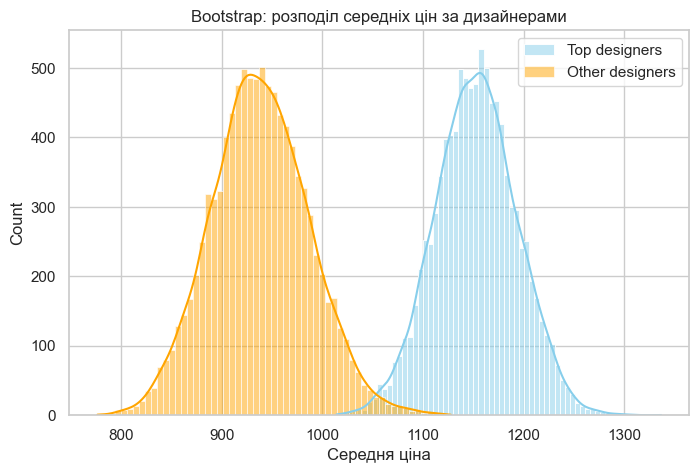

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Беремо тільки дизайнерів з достатньою кількістю товарів
designer_counts = df['designer'].value_counts()
valid_designers = designer_counts[designer_counts >= 30].index

df_designers = df[df['designer'].isin(valid_designers)].copy()

# 2. Формуємо дві групи:
#    топ-5 дизайнерів за кількістю товарів vs всі інші
top_designers = designer_counts.head(5).index

group_top = df_designers[df_designers['designer'].isin(top_designers)]['price']
group_other = df_designers[~df_designers['designer'].isin(top_designers)]['price']

print(f"Top designers group size: {len(group_top)}")
print(f"Other designers group size: {len(group_other)}")

# 3. Bootstrap-тест (перевірка наявності різниці)
def bootstrap_test(x, y, n_bootstraps=10000):
    diffs = []
    x_means = []
    y_means = []

    for _ in range(n_bootstraps):
        x_sample = np.random.choice(x, size=len(x), replace=True)
        y_sample = np.random.choice(y, size=len(y), replace=True)

        diffs.append(np.mean(x_sample) - np.mean(y_sample))
        x_means.append(np.mean(x_sample))
        y_means.append(np.mean(y_sample))

    p_value = np.mean(np.array(diffs) <= 0)
    print(f"P-value: {p_value:.4f}")

    return x_means, y_means, p_value

x_means, y_means, p_value = bootstrap_test(group_top.values, group_other.values)

# 4. Візуалізація bootstrap-розподілів
plt.figure(figsize=(8, 5))
sns.histplot(x_means, color="skyblue", label="Top designers", kde=True)
sns.histplot(y_means, color="orange", label="Other designers", kde=True)
plt.legend()
plt.title("Bootstrap: розподіл середніх цін за дизайнерами")
plt.xlabel("Середня ціна")
plt.show()

In [174]:
# Mann–Whitney U тест (підтвердження результату)
from scipy.stats import mannwhitneyu

u_stat, p_mw = mannwhitneyu(
    group_top,
    group_other,
    alternative='two-sided'
)

print(f"Mann–Whitney U statistic: {u_stat:.2f}")
print(f"Mann–Whitney p-value: {p_mw:.4e}")


Mann–Whitney U statistic: 426670.50
Mann–Whitney p-value: 1.3987e-01


In [175]:
# Cliff’s Delta (оцінка розміру ефекту)
ef cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)

    gt = np.sum(x[:, None] > y)
    lt = np.sum(x[:, None] < y)

    return (gt - lt) / (len(x) * len(y))

delta = cliffs_delta(group_top.values, group_other.values)
print(f"Cliff’s Delta: {delta:.3f}")


SyntaxError: invalid syntax (2001745287.py, line 2)

In [176]:
# KS-test (перевірка форми розподілу)
from scipy.stats import ks_2samp

ks_stat, p_ks = ks_2samp(group_top, group_other)
print(f"KS statistic: {ks_stat:.3f}")
print(f"KS p-value: {p_ks:.4e}")


KS statistic: 0.093
KS p-value: 1.1611e-03


**Bootstrap-тест показав статистично значущу різницю середніх цін між товарами топ-дизайнерів та інших дизайнерів.
Водночас Mann–Whitney тест і низьке значення Cliff’s Delta (0.041) свідчать, що ця різниця має слабку практичну значущість.
KS-test підтвердив наявність відмінностей у формі розподілів, однак вони мають локальний характер.**

## **Машинне навчання**

In [27]:
# Визначаємо цільову змінну (y)
y = df['price']

In [28]:
# Видаляємо непотрібні та проблемні стовпці
cols_to_drop = [
    'price',
    'old_price',
    'old_price_clean',
    'sellable_online',
    'item_id',
    'link',
    'index',         
    'name',
    'short_description'
]

X = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [29]:
#Розділяємо числові та категоріальні ознаки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

print("Числові:", list(numeric_features))
print("Категоріальні:", list(categorical_features))

Числові: ['depth', 'height', 'width']
Категоріальні: ['category', 'other_colors', 'designer']


In [40]:
print("Форма X:", X_encoded.shape)
print("Пропуски:", X_encoded.isna().sum().sum())

Форма X: (2962, 212)
Пропуски: 0


**Baseline модель — LinearRegression
Для побудови базової моделі використано лінійну регресію як простий та інтерпретований алгоритм. Метою є отримання базового значення якості моделі, з яким у подальшому будуть порівнюватися складніші моделі машинного навчання.**

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [35]:
# --- 1. Підготовка даних для моделі ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Цільова змінна
y = df['price']

# Числові та категоріальні ознаки
numeric_features = ['depth', 'height', 'width']
categorical_features = ['category', 'designer', 'other_colors']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Вибір колонок для моделі
X = df[numeric_features + categorical_features]

# Розділення на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Об’єднуємо трансформери в ColumnTransformer
col_prepr = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

print("Підготовка даних виконана успішно")

Підготовка даних виконана успішно


In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Пайплайн + LinearRegression

lr_pipeline = Pipeline(steps=[
    ('preprocessor', col_prepr),
    ('model', LinearRegression())
])

# Навчання моделі

lr_pipeline.fit(X_train, y_train)

# Прогноз та оцінка
y_pred = lr_pipeline.predict(X_test)

print("\nМетрики моделі:")
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
print("MAE: {:.4f}".format(mean_absolute_error(y_test, y_pred)))
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))



Метрики моделі:
R2 score: 0.7074
MAE: 501.2869
RMSE: 742.3502


In [89]:
y_pred = lr_pipeline.predict(X_test)

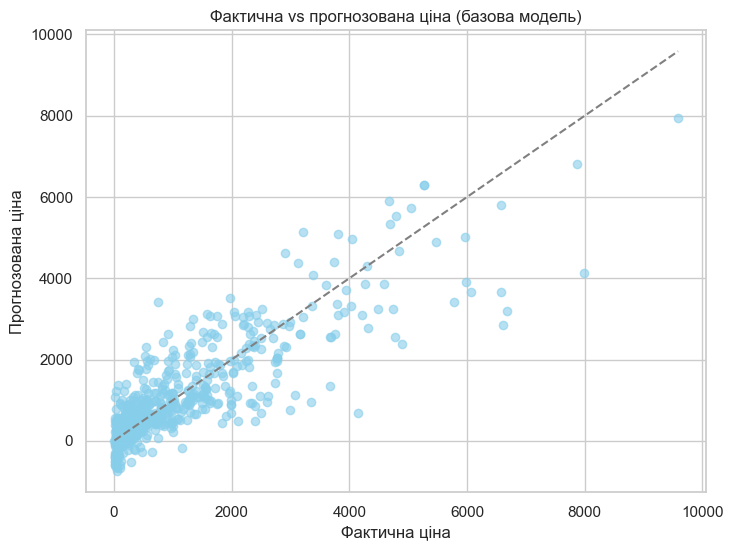

In [178]:
plt.figure(figsize=(8, 6))

plt.scatter(
    y_test.values,
    y_pred,
    alpha=0.6,
    color='skyblue'
)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    color='gray'
)

plt.xlabel("Фактична ціна")
plt.ylabel("Прогнозована ціна")
plt.title("Фактична vs прогнозована ціна (базова модель)")
plt.show()

**Ми побудували базову модель лінійної регресії для прогнозування ціни товарів. Модель пояснює близько 71% варіації ціни (R² = 0.7074), що є прийнятним результатом для простої лінійної моделі.
Середня абсолютна похибка MAE = 501.2869 USD означає, що в середньому прогнозована ціна відрізняється від фактичної приблизно на 500 USD. Значення RMSE = 742.3502 USD свідчить про наявність товарів із більшими відхиленнями прогнозу, особливо в сегменті високих цін.**

**Графік фактичних та прогнозованих значень показує, що модель загалом відтворює загальну тенденцію, проте для дорогих товарів спостерігається значний розкид прогнозів. Це вказує на обмеження лінійної регресії та доцільність використання більш складних моделей.**

In [181]:
from sklearn.ensemble import RandomForestRegressor

# Базовий Random Forest 
rf_pipeline_base = Pipeline(steps=[
    ('preprocessor', col_prepr),
    ('model', RandomForestRegressor(
        n_estimators=120,      
        max_depth=20,        
        min_samples_leaf=1,      
        min_samples_split=4,     
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    ))
])


# Навчання базової моделі
rf_pipeline_base.fit(X_train, y_train)

# Прогноз
y_pred_rf_base = rf_pipeline_base.predict(X_test)

# Метрики
r2_rf_base = r2_score(y_test, y_pred_rf_base)
mae_rf_base = mean_absolute_error(y_test, y_pred_rf_base)
rmse_rf_base = np.sqrt(mean_squared_error(y_test, y_pred_rf_base))

print("Random Forest")
print(f"R2: {r2_rf_base:.4f}")
print(f"MAE: {mae_rf_base:.2f}")
print(f"RMSE: {rmse_rf_base:.2f}")


Random Forest
R2: 0.7478
MAE: 441.40
RMSE: 689.28


**Базова модель Random Forest показала найкращі результати серед усіх розглянутих моделей. Значення R² = 0.7478 свідчить про те, що модель пояснює близько 75% варіації ціни, що є дуже хорошим показником для задачі прогнозування.
Середня абсолютна похибка (MAE = 441,4) значно менша, ніж у лінійної регресії, що означає більш точні прогнози в середньому. Показник RMSE = 689,8 також зменшився, що вказує на кращу роботу моделі з товарами високої вартості.
Загалом, Random Forest краще враховує нелінійні залежності між ознаками та ціною товару, тому може вважатися найбільш стабільною та точною моделлю для цієї задачі навіть без підбору гіперпараметрів.**

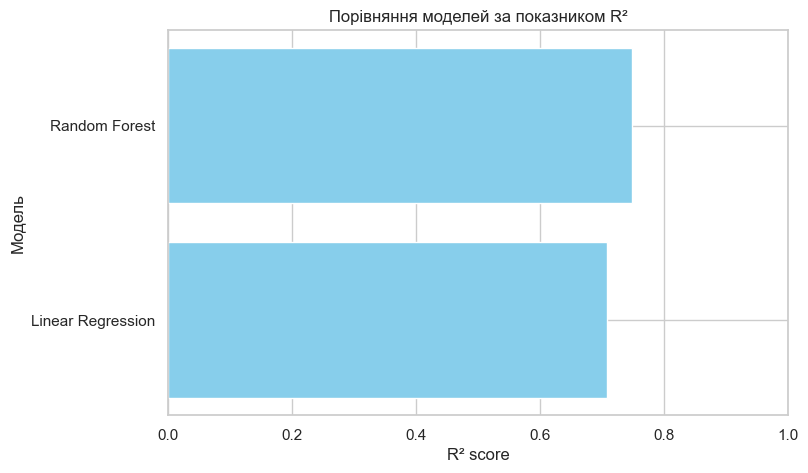

In [182]:
models_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_rf_base)
    ]
})

models_sorted = models_results.sort_values(by='R2', ascending=False)

plt.figure(figsize=(8, 5))

plt.barh(
    models_sorted['Model'],
    models_sorted['R2'],
    color = 'skyblue')

plt.title('Порівняння моделей за показником R²')
plt.xlabel('R² score')
plt.ylabel('Модель')
plt.xlim(0, 1)

plt.gca().invert_yaxis()
plt.show()

**Після сортування моделей за показником R² видно, що Random Forest демонструє найкращу якість прогнозування. Це підтверджує доцільність вибору саме цієї моделі для подальшого підбору гіперпараметрів за допомогою GridSearchCV та фінального навчання.**

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', col_prepr),
    ('model', rf)
])

param_grid = {
    'model__n_estimators': [50, 80, 90, 100],
    'model__max_depth': [10, 50, 100, 150, None],
    'model__max_features': [None, 'sqrt']
}


grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Найкращі параметри:", grid_search.best_params_)
print("Best CV R2:", grid_search.best_score_)

y_pred_rf_grid = grid_search.predict(X_test)

print("\nTest metrics (Random Forest + GridSearchCV):")
print("R2:", r2_score(y_test, y_pred_rf_grid))
print("MAE:", mean_absolute_error(y_test, y_pred_rf_grid))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_grid)))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Найкращі параметри: {'model__max_depth': 100, 'model__max_features': 'sqrt', 'model__n_estimators': 100}
Best CV R2: 0.8037039016392409

Test metrics (Random Forest + GridSearchCV):
R2: 0.8081408742639532
MAE: 348.6572651174669
RMSE: 601.1381781276516


**Ми побудували модель регресії для прогнозування цін товарів IKEA з урахуванням числових та категоріальних ознак. Після підбору гіперпараметрів за допомогою GridSearchCV (cv = 5) були отримані такі результати на тестовому наборі даних:**

**R² score = 0.8081, що означає, що модель пояснює близько 80% варіації ціни товарів.
MAE = 348,65, тобто в середньому прогноз моделі відрізняється від реальної ціни приблизно на 349 одиниць.
RMSE = 601,13, що свідчить про наявність окремих більших відхилень між прогнозованими та фактичними значеннями.**

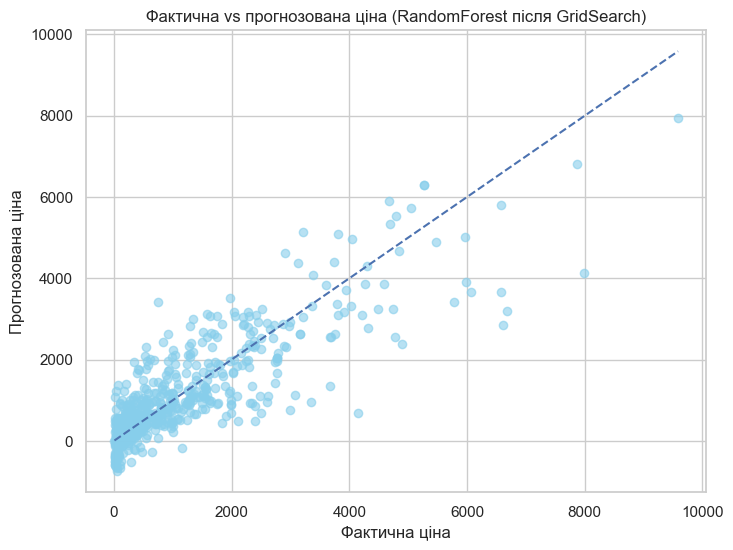

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color = 'skyblue')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)

plt.xlabel("Фактична ціна")
plt.ylabel("Прогнозована ціна")
plt.title("Фактична vs прогнозована ціна (RandomForest після GridSearch)")
plt.show()

**Після застосування GridSearchCV та підбору оптимальних гіперпараметрів моделі RandomForestRegressor спостерігається покращення якості прогнозування. На графіку фактичних та прогнозованих значень видно, що більшість точок розташовані ближче до ідеальної діагоналі, порівняно з базовою моделлю. Це підтверджує зростання показника R² та зменшення похибок прогнозу.**

In [184]:
# 1. Беремо найкращу модель з GridSearchCV
best_pipeline = grid_search.best_estimator_
best_model = best_pipeline.named_steps['model']

# 2. Отримуємо назви фіч після препроцесингу
feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()

# 3. Важливість фіч з RandomForest
importances = best_model.feature_importances_

fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# 4. Групуємо one-hot фічі назад до факторів з X
def map_feature_to_factor(feature):
    if feature.startswith('num__depth'):
        return 'depth'
    elif feature.startswith('num__height'):
        return 'height'
    elif feature.startswith('num__width'):
        return 'width'
    elif feature.startswith('cat__category'):
        return 'category'
    elif feature.startswith('cat__other_colors'):
        return 'other_colors'
    else:
        return 'designer'
grouped_fi = (
    fi_df
        .assign(factor=fi_df['feature'].apply(map_feature_to_factor))
        .groupby('factor', as_index=False)['importance']
        .sum()
)

# 5. Переводимо у відсотки
grouped_fi['importance_percent'] = (
    grouped_fi['importance'] / grouped_fi['importance'].sum() * 100
).round(2)

grouped_fi = grouped_fi.sort_values('importance_percent', ascending=False)

# 6. Таблиця (для markdown)
grouped_fi

,factor,importance,importance_percent
5,width,0.331393,33.14
2,designer,0.270192,27.02
1,depth,0.168398,16.84
3,height,0.108244,10.82
0,category,0.101336,10.13
4,other_colors,0.020438,2.04


**Аналіз важливості ознак для моделі Random Forest після GridSearchCV показав, що ключовий вплив на формування ціни товарів мають габаритні характеристики. Також велику роль відіграють дизайнери.**

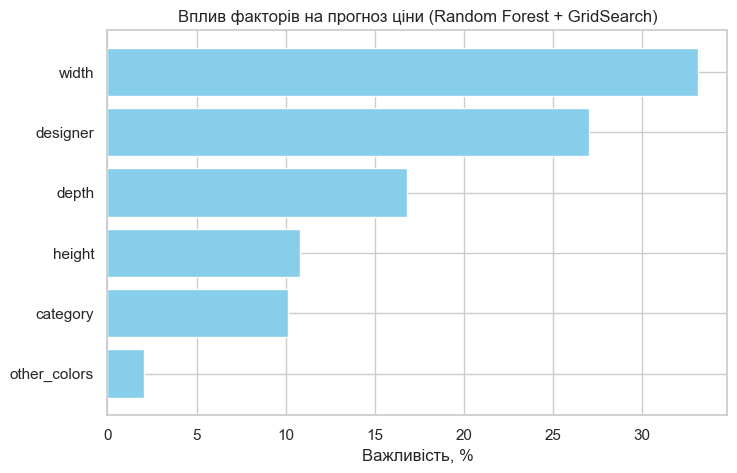

In [185]:
plt.figure(figsize=(8, 5))
plt.barh(
    grouped_fi['factor'],
    grouped_fi['importance_percent'],
    color='skyblue'
)
plt.xlabel('Важливість, %')
plt.title('Вплив факторів на прогноз ціни (Random Forest + GridSearch)')
plt.gca().invert_yaxis()
plt.show()

**З графіка видно, що найбільший вплив на прогноз ціни має ширина товару, тоді як інші ознаки (глибина, висота, категорія та кольори) мають значно менший внесок.З графіка видно, що найбільший вплив на прогноз ціни має ширина товару, тоді як інші ознаки (глибина, висота, категорія та кольори) мають значно менший внесок.**

In [187]:
y_pred_lr = lr_pipeline.predict(X_test)


In [188]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

comparison_df = pd.DataFrame({
    "Модель": [
        "Linear Regression (baseline)",
        "Random Forest (базова)",
        "Random Forest + GridSearchCV"
    ],
    "R²": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf_base),
        r2_score(y_test, y_pred_rf_grid)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf_base),
        mean_absolute_error(y_test, y_pred_rf_grid)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf_base)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf_grid))
    ]
})

# Округлення
comparison_df["R²"] = comparison_df["R²"].round(3)
comparison_df["MAE"] = comparison_df["MAE"].round(2)
comparison_df["RMSE"] = comparison_df["RMSE"].round(2)

print(
    comparison_df.to_markdown(
        index=False,
        tablefmt="github",
        colalign=("left", "right", "right", "right")
    )
)


| Модель                       |    R² |    MAE |   RMSE |
|------------------------------|-------|--------|--------|
| Linear Regression (baseline) | 0.707 | 501.29 | 742.35 |
| Random Forest (базова)       | 0.748 |  441.4 | 689.28 |
| Random Forest + GridSearchCV | 0.808 | 348.66 | 601.14 |


**Порівняння моделей показало, що базова модель Random Forest демонструє гіршу якість прогнозування порівняно з моделлю Random Forest після GridSearchCV.**

In [191]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    grid_search.best_estimator_,
    X_train,
    y_train,
    scoring='r2',
    cv=cv,
    n_jobs=-1
)

print("R2 на кожному фолді:", cv_scores)
print("Середній R2:", cv_scores.mean())
print("Стандартне відхилення:", cv_scores.std())


R2 на кожному фолді: [0.80289789 0.80547421 0.80699307 0.7902039  0.8603082 ]
Середній R2: 0.8131754543829997
Стандартне відхилення: 0.024299578122910163


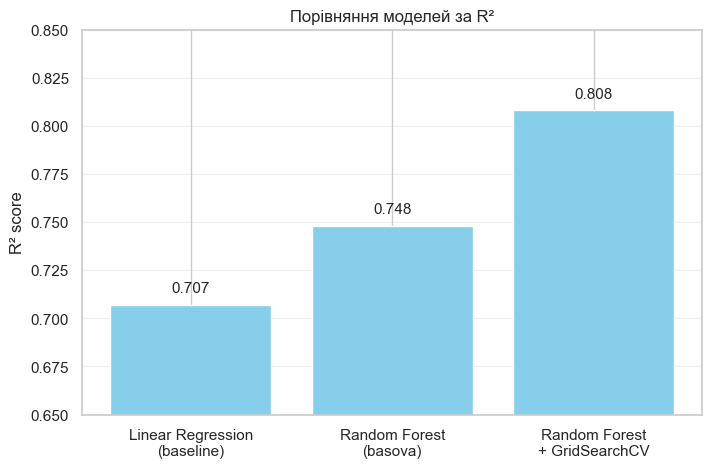

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# Дані
models = [
    "Linear Regression\n(baseline)",
    "Random Forest\n(basova)",
    "Random Forest\n+ GridSearchCV"
]

r2_scores = [0.707, 0.748, 0.808]

# Побудова
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color='skyblue')

# Підпис значень
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.3f}",
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.ylim(0.65, 0.85)
plt.ylabel("R² score")
plt.title("Порівняння моделей за R²")
plt.grid(axis='y', alpha=0.3)

plt.show()


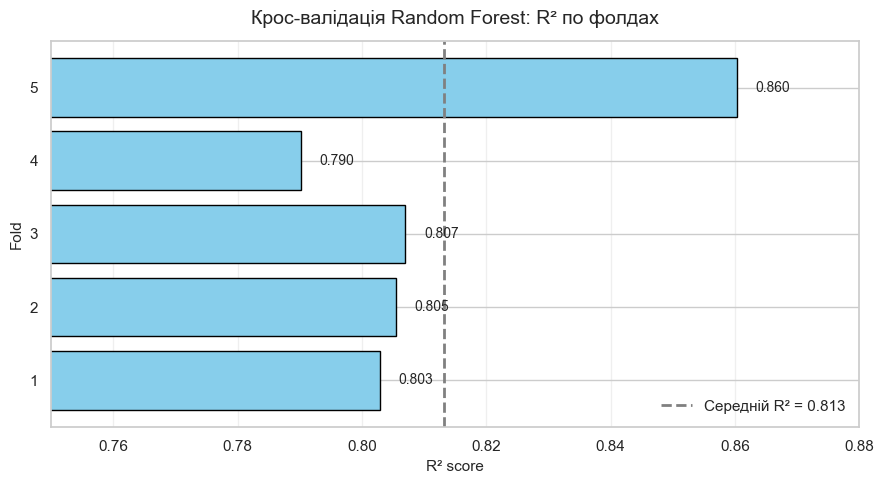

In [192]:
import matplotlib.pyplot as plt
import numpy as np

folds = np.arange(1, len(cv_scores) + 1)
mean_r2 = np.mean(cv_scores)

plt.figure(figsize=(9, 5))


plt.barh(
    folds,
    cv_scores,
    color='skyblue',
    edgecolor='black'
)

# Лінія середнього R² 
plt.axvline(
    mean_r2,
    color='gray',
    linestyle='--',
    linewidth=2,
    label=f'Середній R² = {mean_r2:.3f}'
)

for i, v in enumerate(cv_scores):
    plt.text(
        v + 0.003,
        folds[i],
        f"{v:.3f}",
        va='center',
        fontsize=10
    )

plt.title('Крос-валідація Random Forest: R² по фолдах', fontsize=14, pad=12)
plt.xlabel('R² score', fontsize=11)
plt.ylabel('Fold', fontsize=11)

plt.xlim(0.75, 0.88)
plt.yticks(folds)
plt.grid(axis='x', alpha=0.3)
plt.legend(frameon=False)

plt.tight_layout()
plt.show()


**Для оцінки стабільності моделі було застосовано крос-валідацію KFold з 5 фолдами та перемішуванням даних. Значення коефіцієнта детермінації R² на кожному фолді є узгодженими та не демонструють різких коливань. Середнє значення R² становить приблизно 0.81, а стандартне відхилення — близько 0.02, що свідчить про відсутність перенавчання та добру узагальнювальну здатність моделі.**

## **Фінальний висновок**

**У межах проєкту було реалізовано повний цикл аналізу даних, включно з попередньою обробкою, побудовою моделей та їх оцінкою. Як базову модель було використано лінійну регресію. Для покращення якості прогнозу було застосовано ансамблевий метод Random Forest, гіперпараметри якого підбиралися з урахуванням обсягу даних та ризику перенавчання. У результаті вдалося досягти коефіцієнта детермінації R² понад 0.8 на тестовій вибірці, а також стабільних результатів на крос-валідації. Отримана модель демонструє хорошу узагальнювальну здатність і може бути використана для практичного прогнозування.**